# Advanced Data Analysis Nanodegree Program

## Data Visualization Project (Part1: Exploratory Data Analysis)

## Overview
Zaden Group is one of the leading retailers industry in the region, with more than 50 branches across the region. It runs multiple lines of business applications, mainly in the sport goods industry. They are in the middle of their digital transformation journey and they want to keep leading the market by satisfying their customers and meeting their expectation.


## Business Environment and Goals
Zaden Group will releasing an advanced analytics RFP.  
The first part of the meeting will include people from two teams, the marketing team and the management team. We want to see the value from using your platform for advanced analytics and the data platform challenges that accompany it. Given the data sample we provided from our sales databases, we want to know if using advanced analytics you can help the marketing team. While the marketing team will be interest to see if they can increase their efficiency, the management team want to know if using advanced analytics may increase sales in general.


## The Sales Data Sample
The provided data represents information from a marketing campaign. We you provided information about the product in the campaign/offer that was send to a specific customer and the convergence result of this campaign (label attribute).  We provided you we every attribute we have about the product, use what ever you see make sense to solve the defined project.
Here is a list of the attributes:
•	country:Country name

•	article:6 digit article number, as unique identifier of an article

•	sales:total number of units sold in respective retail week

•	regular_price: recommended retail price of the article

•	current_price: 	current selling price (weighted average over the week)

•	ratio:	price ratio as current_price/regular_price, such that price discount is 1-ratio 

•	retailweek:	start date of the retailweek

•	promo1:	indicator for media advertisement, taking 1 in weeks of activation and 0 otherwise

•	promo2:	indicator for store events, taking 1 in weeks with events and 0 otherwise

•	customer_id:customer unique identifier, one id per customer

•	article: 	6 digit article number, as unique identifier of an article

•	productgroup:	product group the article belongs to

•	category:	product category the article belongs to

•	cost:	total costs of the article (assumed to be fixed over time)

•	style:	description of article design

•	sizes:	size range in which article is available

•	gender:	gender of target consumer of the article

•	rgb_*_main_color:intensity of the red (r), green (g), and blue (b) primaries of the article‘s  main color, taking values [0,250]

•	rgb_*_sec_color: intensity of the red (r), green (g), and blue (b) primaries of the article‘s secondary color, taking values [0,250]

•	label:	advertisement result after offering/sending/presenting the offer to the customer. 0 means the customer did not buy and 1 means the costomer did buy.


## Questions need to be Answered
1-Where is the most labels come from?

2-Where is the most sales come from?

3-are promo1/2 affect label?

4-what are the features that affect Sales?

5-what the relation between each voriable to another?

6-do we drope at Specific time in the year?

7-what is the KPI for label?

In [ ]:
#import pandas 
import pandas as pd
#data file path
ZadenGroup_file_path = "E:/FWD/4-Data Visualization/Final project/Data set/full_gen_data.csv"
#import the CSV file
sales_data = pd.read_csv(ZadenGroup_file_path) 

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
country           100000 non-null object
article           100000 non-null object
sales             100000 non-null int64
regular_price     100000 non-null float64
current_price     100000 non-null float64
ratio             100000 non-null float64
retailweek        100000 non-null object
promo1            100000 non-null int64
promo2            100000 non-null int64
customer_id       100000 non-null float64
article.1         100000 non-null object
productgroup      100000 non-null object
category          100000 non-null object
cost              100000 non-null float64
style             100000 non-null object
sizes             100000 non-null object
gender            100000 non-null object
rgb_r_main_col    100000 non-null int64
rgb_g_main_col    100000 non-null int64
rgb_b_main_col    100000 non-null int64
rgb_r_sec_col     100000 non-null int64
rgb_g_sec_col     100000 non-nu

In [4]:
sales_data.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0


In [13]:
sales_data.describe()

,sales,regular_price,current_price,ratio,promo1,promo2,customer_id,cost,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,56.781800,52.391200,28.290800,0.545646,0.061900,0.004900,2721.726500,6.517000,161.400000,139.600000,133.500000,207.700000,181.400000,209.900000,0.13928
std,87.934743,35.272128,22.578343,0.194363,0.240975,0.069829,1908.085499,3.914728,39.790147,63.641814,81.148727,35.313205,23.474359,45.306849,0.34624
min,1.000000,3.950000,1.950000,0.296482,0.000000,0.000000,1.000000,1.290000,79.000000,26.000000,0.000000,164.000000,155.000000,155.000000,0.00000
25%,10.000000,25.950000,11.950000,0.354839,0.000000,0.000000,1017.000000,2.290000,138.000000,104.000000,57.000000,164.000000,155.000000,155.000000,0.00000
50%,26.000000,40.950000,20.950000,0.525044,0.000000,0.000000,2091.000000,6.950000,160.000000,144.000000,143.000000,205.000000,187.000000,238.000000,0.00000
75%,64.000000,79.950000,37.950000,0.699248,0.000000,0.000000,4570.250000,9.600000,205.000000,181.000000,205.000000,255.000000,211.000000,255.000000,0.00000
max,898.000000,197.950000,195.950000,1.000000,1.000000,1.000000,5999.000000,13.290000,205.000000,238.000000,250.000000,255.000000,211.000000,255.000000,1.00000


# 1) Univariate Exploration

## *Histograms/Distributions

In [5]:
#I'll start by looking at the distribution of the main variable of interest: price.

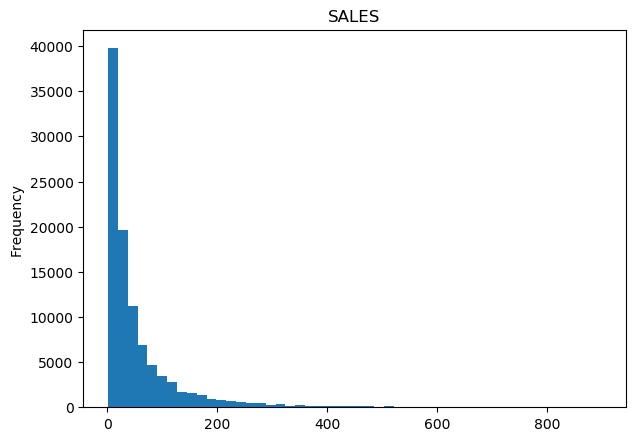

In [6]:
# SALES

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

#Define x as sensor_reading
x = sales_data['sales']

# Plot Histogram on x

plt.hist(x, bins=50)
plt.gca().set(title='SALES', ylabel='Frequency');

sKEWED TO THE RIGHT

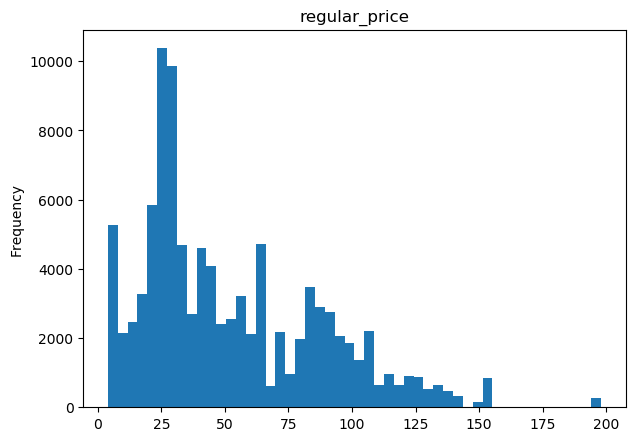

In [7]:
# regular_price

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

#Define x as sensor_reading
x = sales_data['regular_price']

# Plot Histogram on x

plt.hist(x, bins=50)
plt.gca().set(title='regular_price', ylabel='Frequency');


In [ ]:
Regular price seems has biModal, skewed to the right 

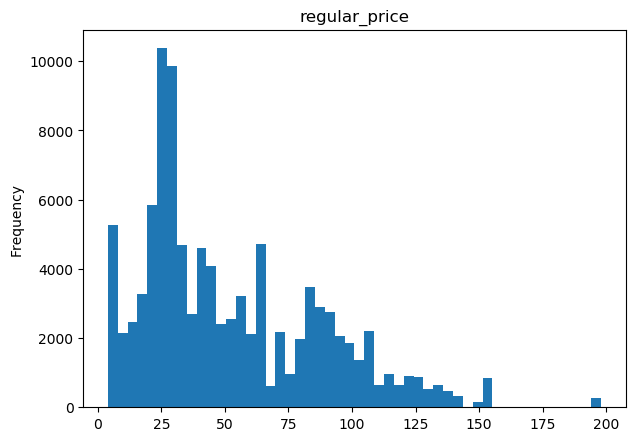

In [8]:
# regular_price

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

#Define x as sensor_reading
x = sales_data['regular_price']

# Plot Histogram on x

plt.hist(x, bins=50)
plt.gca().set(title='regular_price', ylabel='Frequency');


the regular price distribution looks roughly bimodal and skewed tho the right

let's Normalize it to to make sure it is skewed

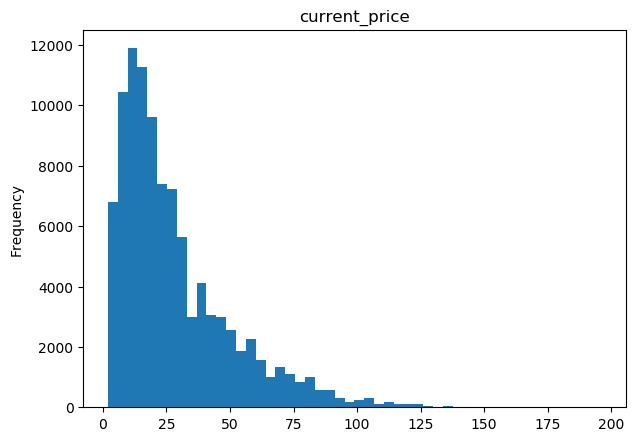

In [9]:
# current_price     

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

#Define x as sensor_reading
x = sales_data['current_price']

# Plot Histogram on x
plt.hist(x, bins=50)
plt.gca().set(title='current_price', ylabel='Frequency');

current price is skewd to the right

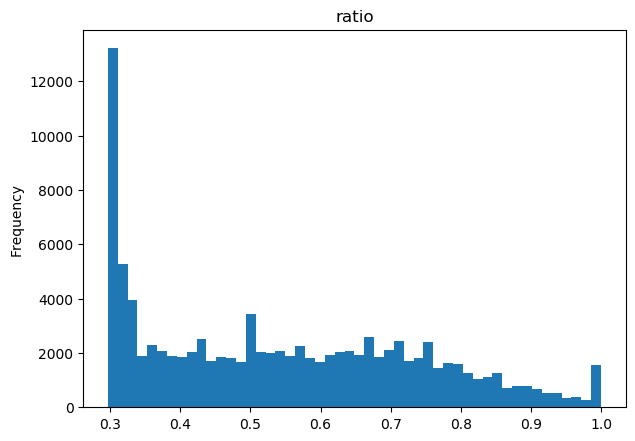

In [16]:
# ratio     

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

#Define x as sensor_reading
x = sales_data['ratio']

# Plot Histogram on x
plt.hist(x, bins=50)
plt.gca().set(title='ratio', ylabel='Frequency');

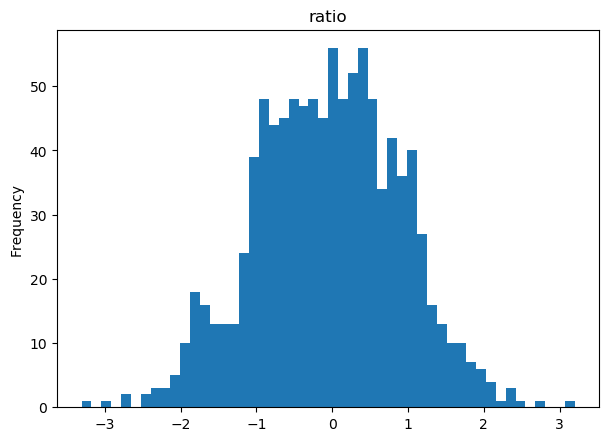

In [18]:
# normalized ratio     

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

#Define x as sensor_reading
x = sales_data['ratio']

# Plot Histogram on x
x = np.random.normal(size = 1000)
plt.hist(x, bins=50)
plt.gca().set(title='ratio', ylabel='Frequency');

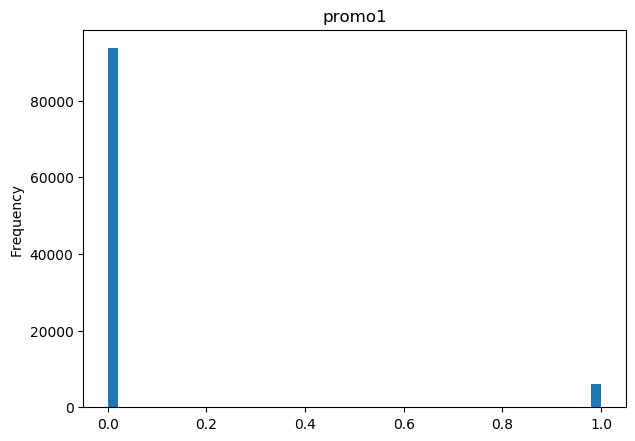

In [20]:
# promo 1     

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

#Define x as sensor_reading
x = sales_data['promo1']

# Plot Histogram on x
plt.hist(x, bins=50)
plt.gca().set(title='promo1', ylabel='Frequency');

it is boolean, Yes/No

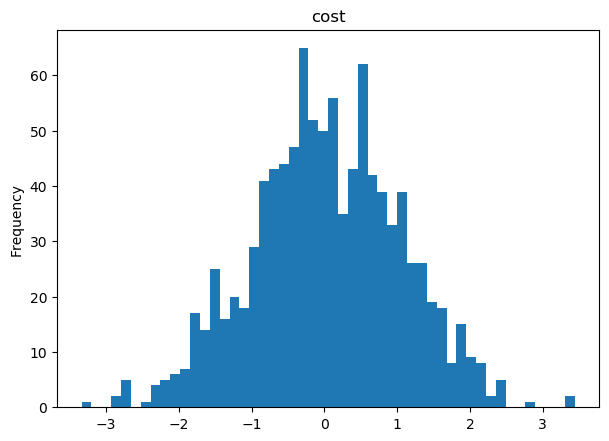

In [27]:
# cost     

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

#Define x as sensor_reading
x = sales_data['cost']

# Plot Histogram on x
x = np.random.normal(size = 1000)
plt.hist(x, bins=50)
plt.gca().set(title='cost', ylabel='Frequency');

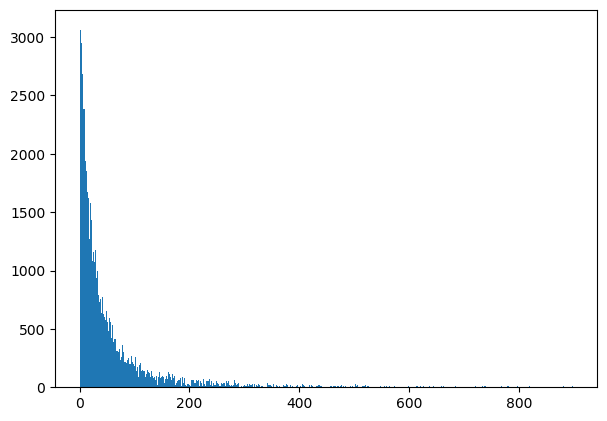

In [28]:
import numpy as np
bin_edges = np.arange(0, sales_data['sales'].max()+1, 1)
plt.hist(data = sales_data, x = 'sales', bins = bin_edges);

skewed to the right

## *Bar plots of Categoricals

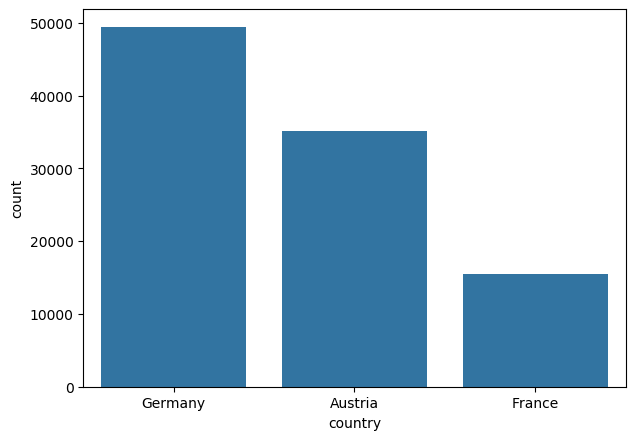

In [30]:
# country
base_color = sb.color_palette()[0]
cat_order = sales_data['country'].value_counts().index
sb.countplot(data = sales_data, x = 'country', color = base_color, order = cat_order)

Most of records come from Germany

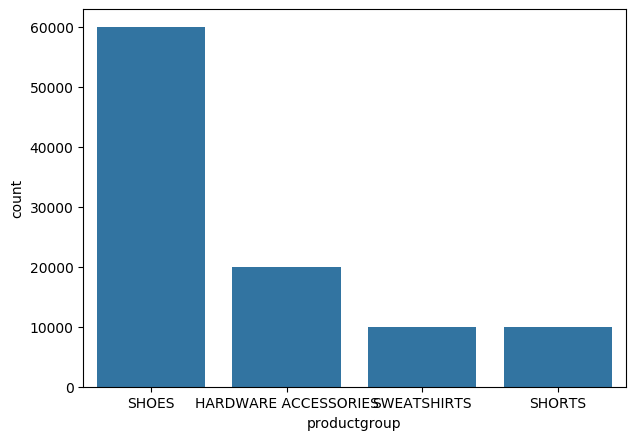

In [31]:
# productgroup

import seaborn as sb
base_color = sb.color_palette()[0]
cat_order = sales_data['productgroup'].value_counts().index
sb.countplot(data = sales_data, x = 'productgroup', color = base_color, order = cat_order)

Most of records come from SHOES 

[Text(0, 0, 'TRAINING'),
 Text(0, 0, 'RUNNING'),
 Text(0, 0, 'FOOTBALL GENERIC'),
 Text(0, 0, 'RELAX CASUAL'),
 Text(0, 0, 'INDOOR'),
 Text(0, 0, 'GOLF')]

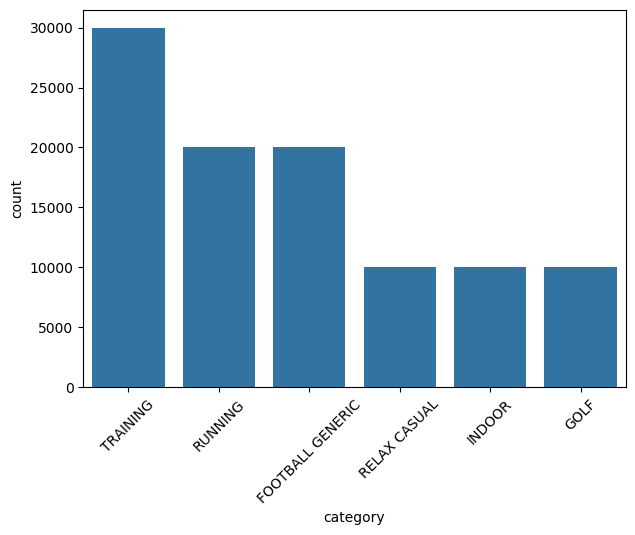

In [32]:
# category

import seaborn as sb
base_color = sb.color_palette()[0]
cat_order = sales_data['category'].value_counts().index
chart = sb.countplot(data = sales_data, x = 'category', color = base_color, order = cat_order)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

most of records come from Training category 

[Text(0, 0, 'regular'), Text(0, 0, 'wide'), Text(0, 0, 'slim')]

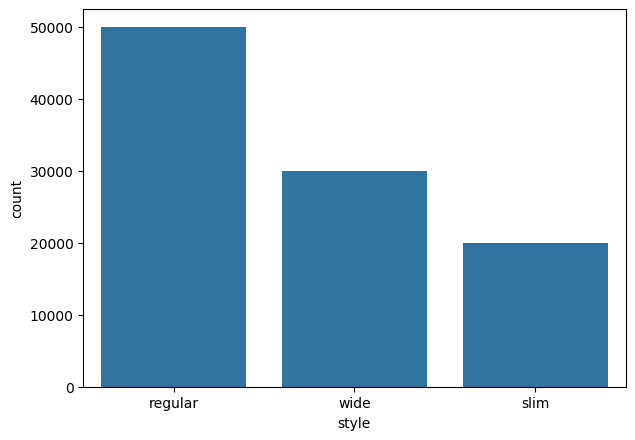

In [33]:
# style
import seaborn as sb
base_color = sb.color_palette()[0]
cat_order = sales_data['style'].value_counts().index
chart = sb.countplot(data = sales_data, x = 'style', color = base_color, order = cat_order)
chart.set_xticklabels(chart.get_xticklabels())

most of records come from Regular style

## * Bie Chart

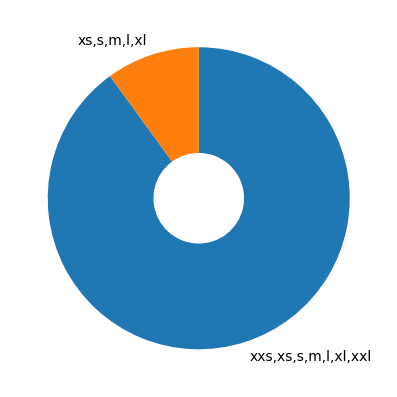

In [45]:
import matplotlib.pyplot as plt
sorted_counts = sales_data['sizes'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.7});
#plt.axis('sizes')

In [2]:
rarely, Customers get xs,s,m,l,xl togeter at the same payment 

SyntaxError: invalid syntax (<ipython-input-2-04db1e561a9c>, line 1)

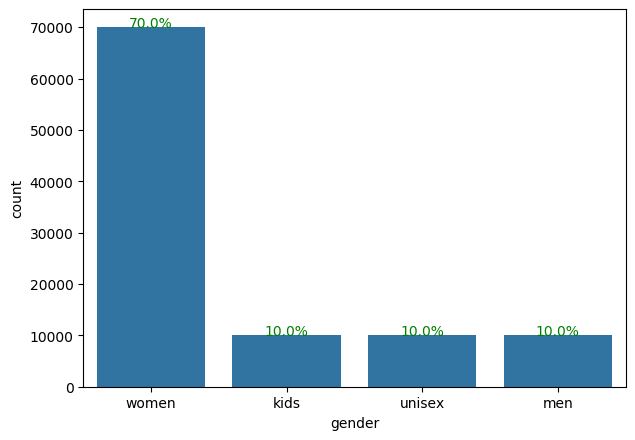

In [36]:
#Gender

# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = sales_data, x = 'gender', color = base_color)

# add annotations
n_points = sales_data.shape[0]
cat_counts = sales_data['gender'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'g')

70% of our records come from Women

## *BoxPlot

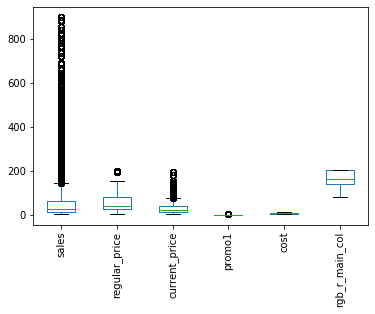

In [33]:
#note you can use box plot by matplotlib to get statistical info of Continues Variables and get the ouliers
sales_data.boxplot(column =['sales', 'regular_price', 'current_price', 'promo1', 'cost', 'rgb_r_main_col'], grid=False, rot=90, fontsize=10)

Howevere there are outliers but according to data documentation, this is correct data and importan, so i'll not drope it

# 2)Bivariate

In [19]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
country           100000 non-null object
article           100000 non-null object
sales             100000 non-null int64
regular_price     100000 non-null float64
current_price     100000 non-null float64
ratio             100000 non-null float64
retailweek        100000 non-null datetime64[ns]
promo1            100000 non-null int64
promo2            100000 non-null int64
customer_id       100000 non-null float64
article.1         100000 non-null object
productgroup      100000 non-null object
category          100000 non-null object
cost              100000 non-null float64
style             100000 non-null object
sizes             100000 non-null object
gender            100000 non-null object
rgb_r_main_col    100000 non-null int64
rgb_g_main_col    100000 non-null int64
rgb_b_main_col    100000 non-null int64
rgb_r_sec_col     100000 non-null int64
rgb_g_sec_col     10000

In [14]:
sales_data.head(3)

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0


## *Line plot/ Time Serries

In [18]:
sales_data.retailweek =  pd.to_datetime(sales_data['retailweek'])

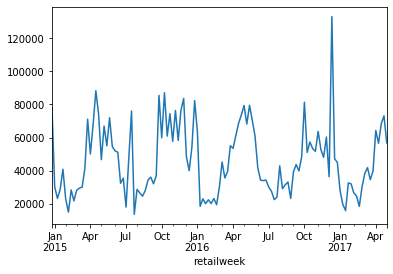

In [27]:
from matplotlib import pyplot
TS= sales_data.groupby(['retailweek']).sum().sales
TS.plot()
pyplot.show()

Sales droped during 2014 and 2017, and was great at 2015, 2016

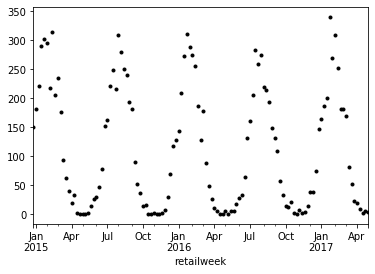

In [32]:
from matplotlib import pyplot
TS= sales_data.groupby(['retailweek']).sum().label
TS.plot(style='k.')
pyplot.show()

Trends shows that labels droppen in Q2 and Q4 each year

## *BarPlot

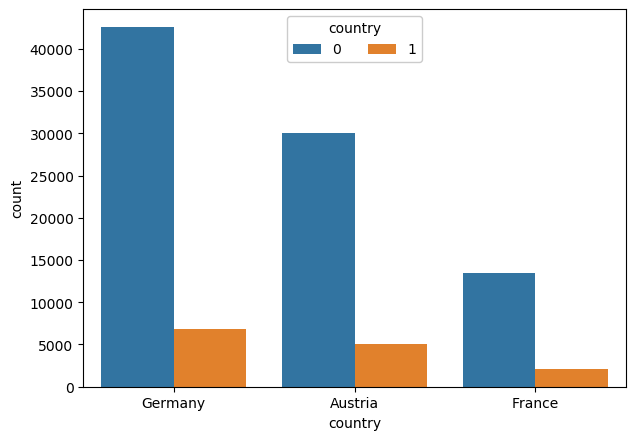

In [74]:
ax = sb.countplot(data = sales_data, x = 'country', hue = 'label')
ax.legend(loc = 9, ncol = 2, framealpha = 1, title = 'country')

most of labels come from Germany

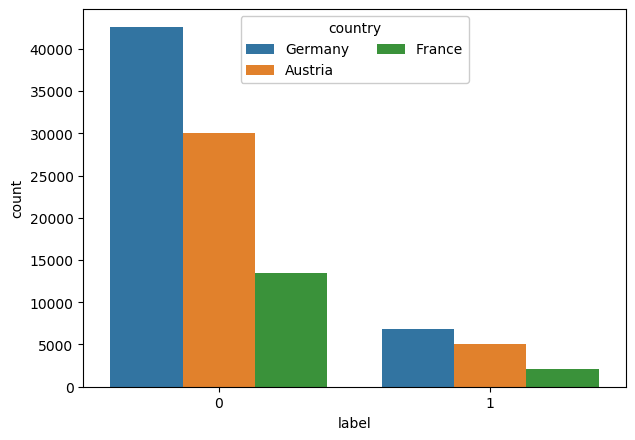

In [83]:
ax = sb.countplot(data = sales_data, x = 'label', hue = 'country')
ax.legend(loc = 9, ncol = 2, framealpha = 1, title = 'country')

Most of label 1 come from Germany

In [91]:
sales_data['sales'].groupby(sales_data['country']).value_counts()

country  sales
Austria  4        1080
         2        1070
         1        1050
         3        1040
         5         900
                  ... 
Germany  819        10
         827        10
         841        10
         881        10
         883        10
Name: sales, Length: 969, dtype: int64

In [162]:
sales_data.groupby(['country']).sum()

,sales,regular_price,current_price,ratio,promo1,promo2,customer_id,cost,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
country,,,,,,,,,,,,,,,
Austria,1992300,1.830073e+06,9.974630e+05,19341.351830,2270,0,175874920.0,229007.38,5671596,4905544,4691190,7298578,6374396,7375886,5044
France,886760,8.779870e+05,4.719670e+05,8369.587030,900,490,46713820.0,100752.82,2495244,2158216,2063910,3211042,2804444,3245054,2047
Germany,2799120,2.531060e+06,1.359650e+06,26853.647486,3020,0,49583910.0,321939.80,7973160,6896240,6594900,10260380,8961160,10369060,6837


In [163]:
salespercountry = sales_data.groupby(['country']).sum().label
salespercountry

country
Austria    5044
France     2047
Germany    6837
Name: label, dtype: int64

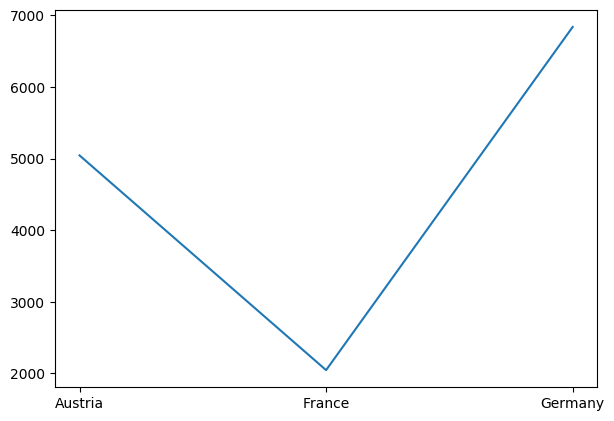

In [164]:
plt.plot(salespercountry)

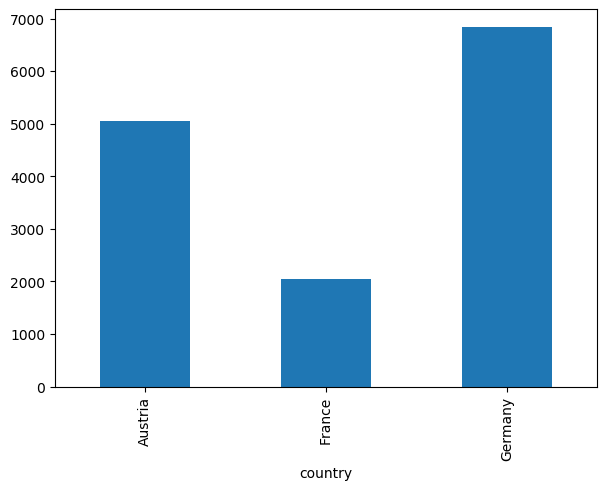

In [168]:
salespercountry.plot.bar()

most of our labels come from Germany

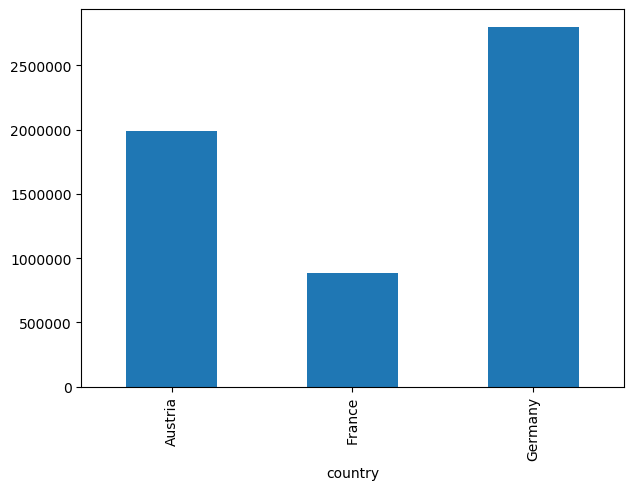

In [169]:
sales_data.groupby(['country']).sum().sales.plot.bar()

most of our sales come from Germany

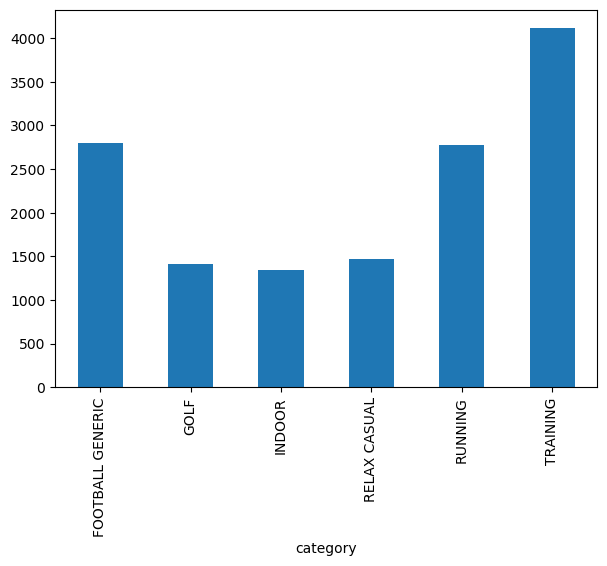

In [170]:
sales_data.groupby(['category']).sum().label.plot.bar()

most of our labels come from Training Category

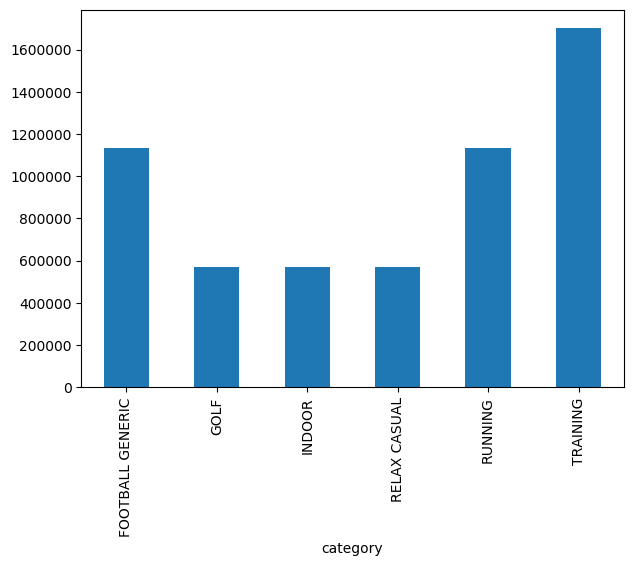

In [172]:
sales_data.groupby(['category']).sum().sales.plot.bar()

most of our sales come from Training Category

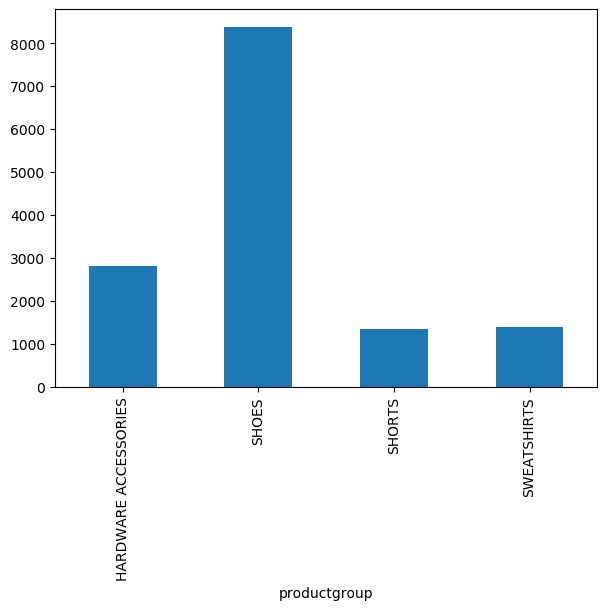

In [174]:
sales_data.groupby(['productgroup']).sum().label.plot.bar()

most of our labels come from SHOES Product

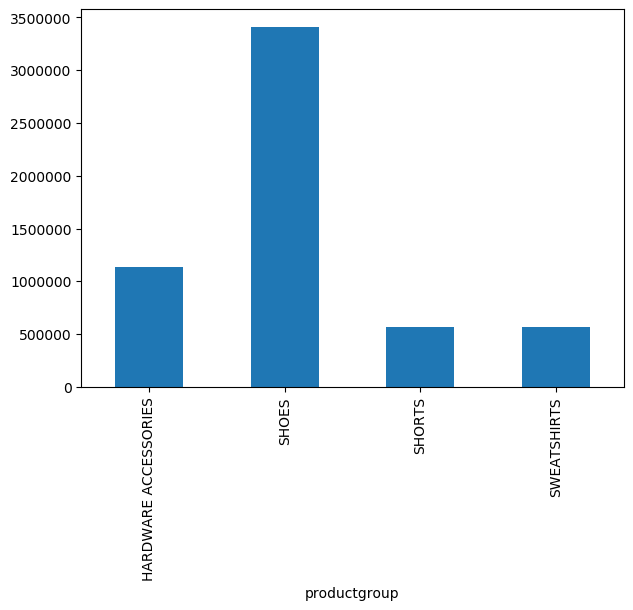

In [175]:
sales_data.groupby(['productgroup']).sum().sales.plot.bar()

most of our sales come from SHOES Product

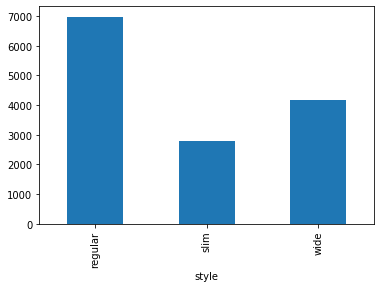

In [3]:
sales_data.groupby(['style']).sum().label.plot.bar()

most of our labels come from style Regular

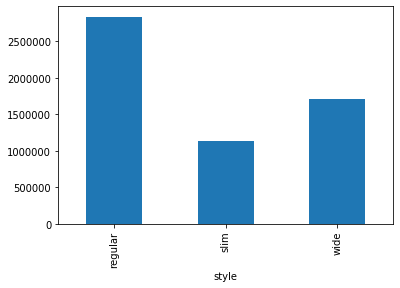

In [4]:
sales_data.groupby(['style']).sum().sales.plot.bar()

most of our sales come from style Regular

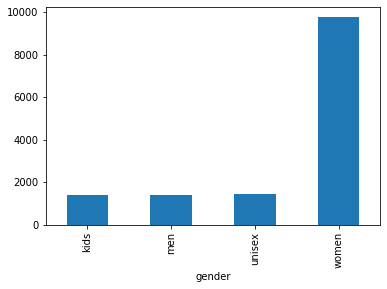

In [5]:
sales_data.groupby(['gender']).sum().label.plot.bar()

Most of our labels come from gender: Women

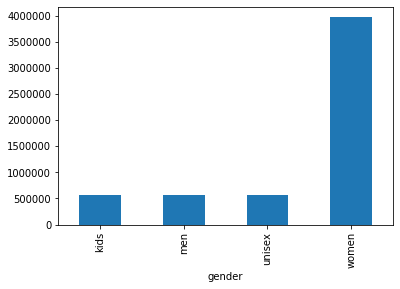

In [6]:
sales_data.groupby(['gender']).sum().sales.plot.bar()

Most of our sales come from gender: Women

## *Scatterplot/Hetmap Correlation between numerics

In [68]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
country           100000 non-null object
article           100000 non-null object
sales             100000 non-null int64
regular_price     100000 non-null float64
current_price     100000 non-null float64
ratio             100000 non-null float64
retailweek        100000 non-null object
promo1            100000 non-null int64
promo2            100000 non-null int64
customer_id       100000 non-null float64
article.1         100000 non-null object
productgroup      100000 non-null object
category          100000 non-null object
cost              100000 non-null float64
style             100000 non-null object
sizes             100000 non-null object
gender            100000 non-null object
rgb_r_main_col    100000 non-null int64
rgb_g_main_col    100000 non-null int64
rgb_b_main_col    100000 non-null int64
rgb_r_sec_col     100000 non-null int64
rgb_g_sec_col     100000 non-nu

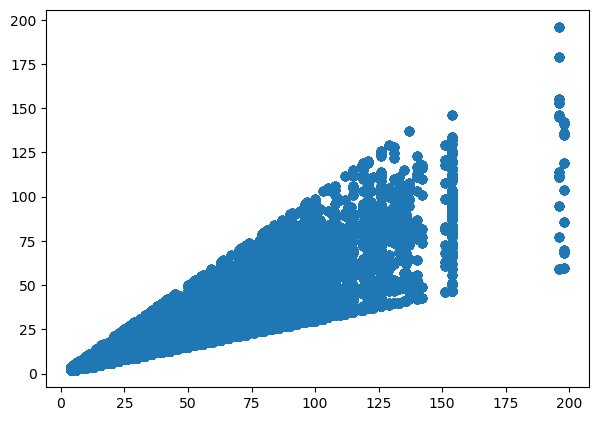

In [58]:
plt.scatter(data = sales_data, x = 'regular_price', y = 'current_price')

There is strong positive correlation between 'regular_price', 'current_price'

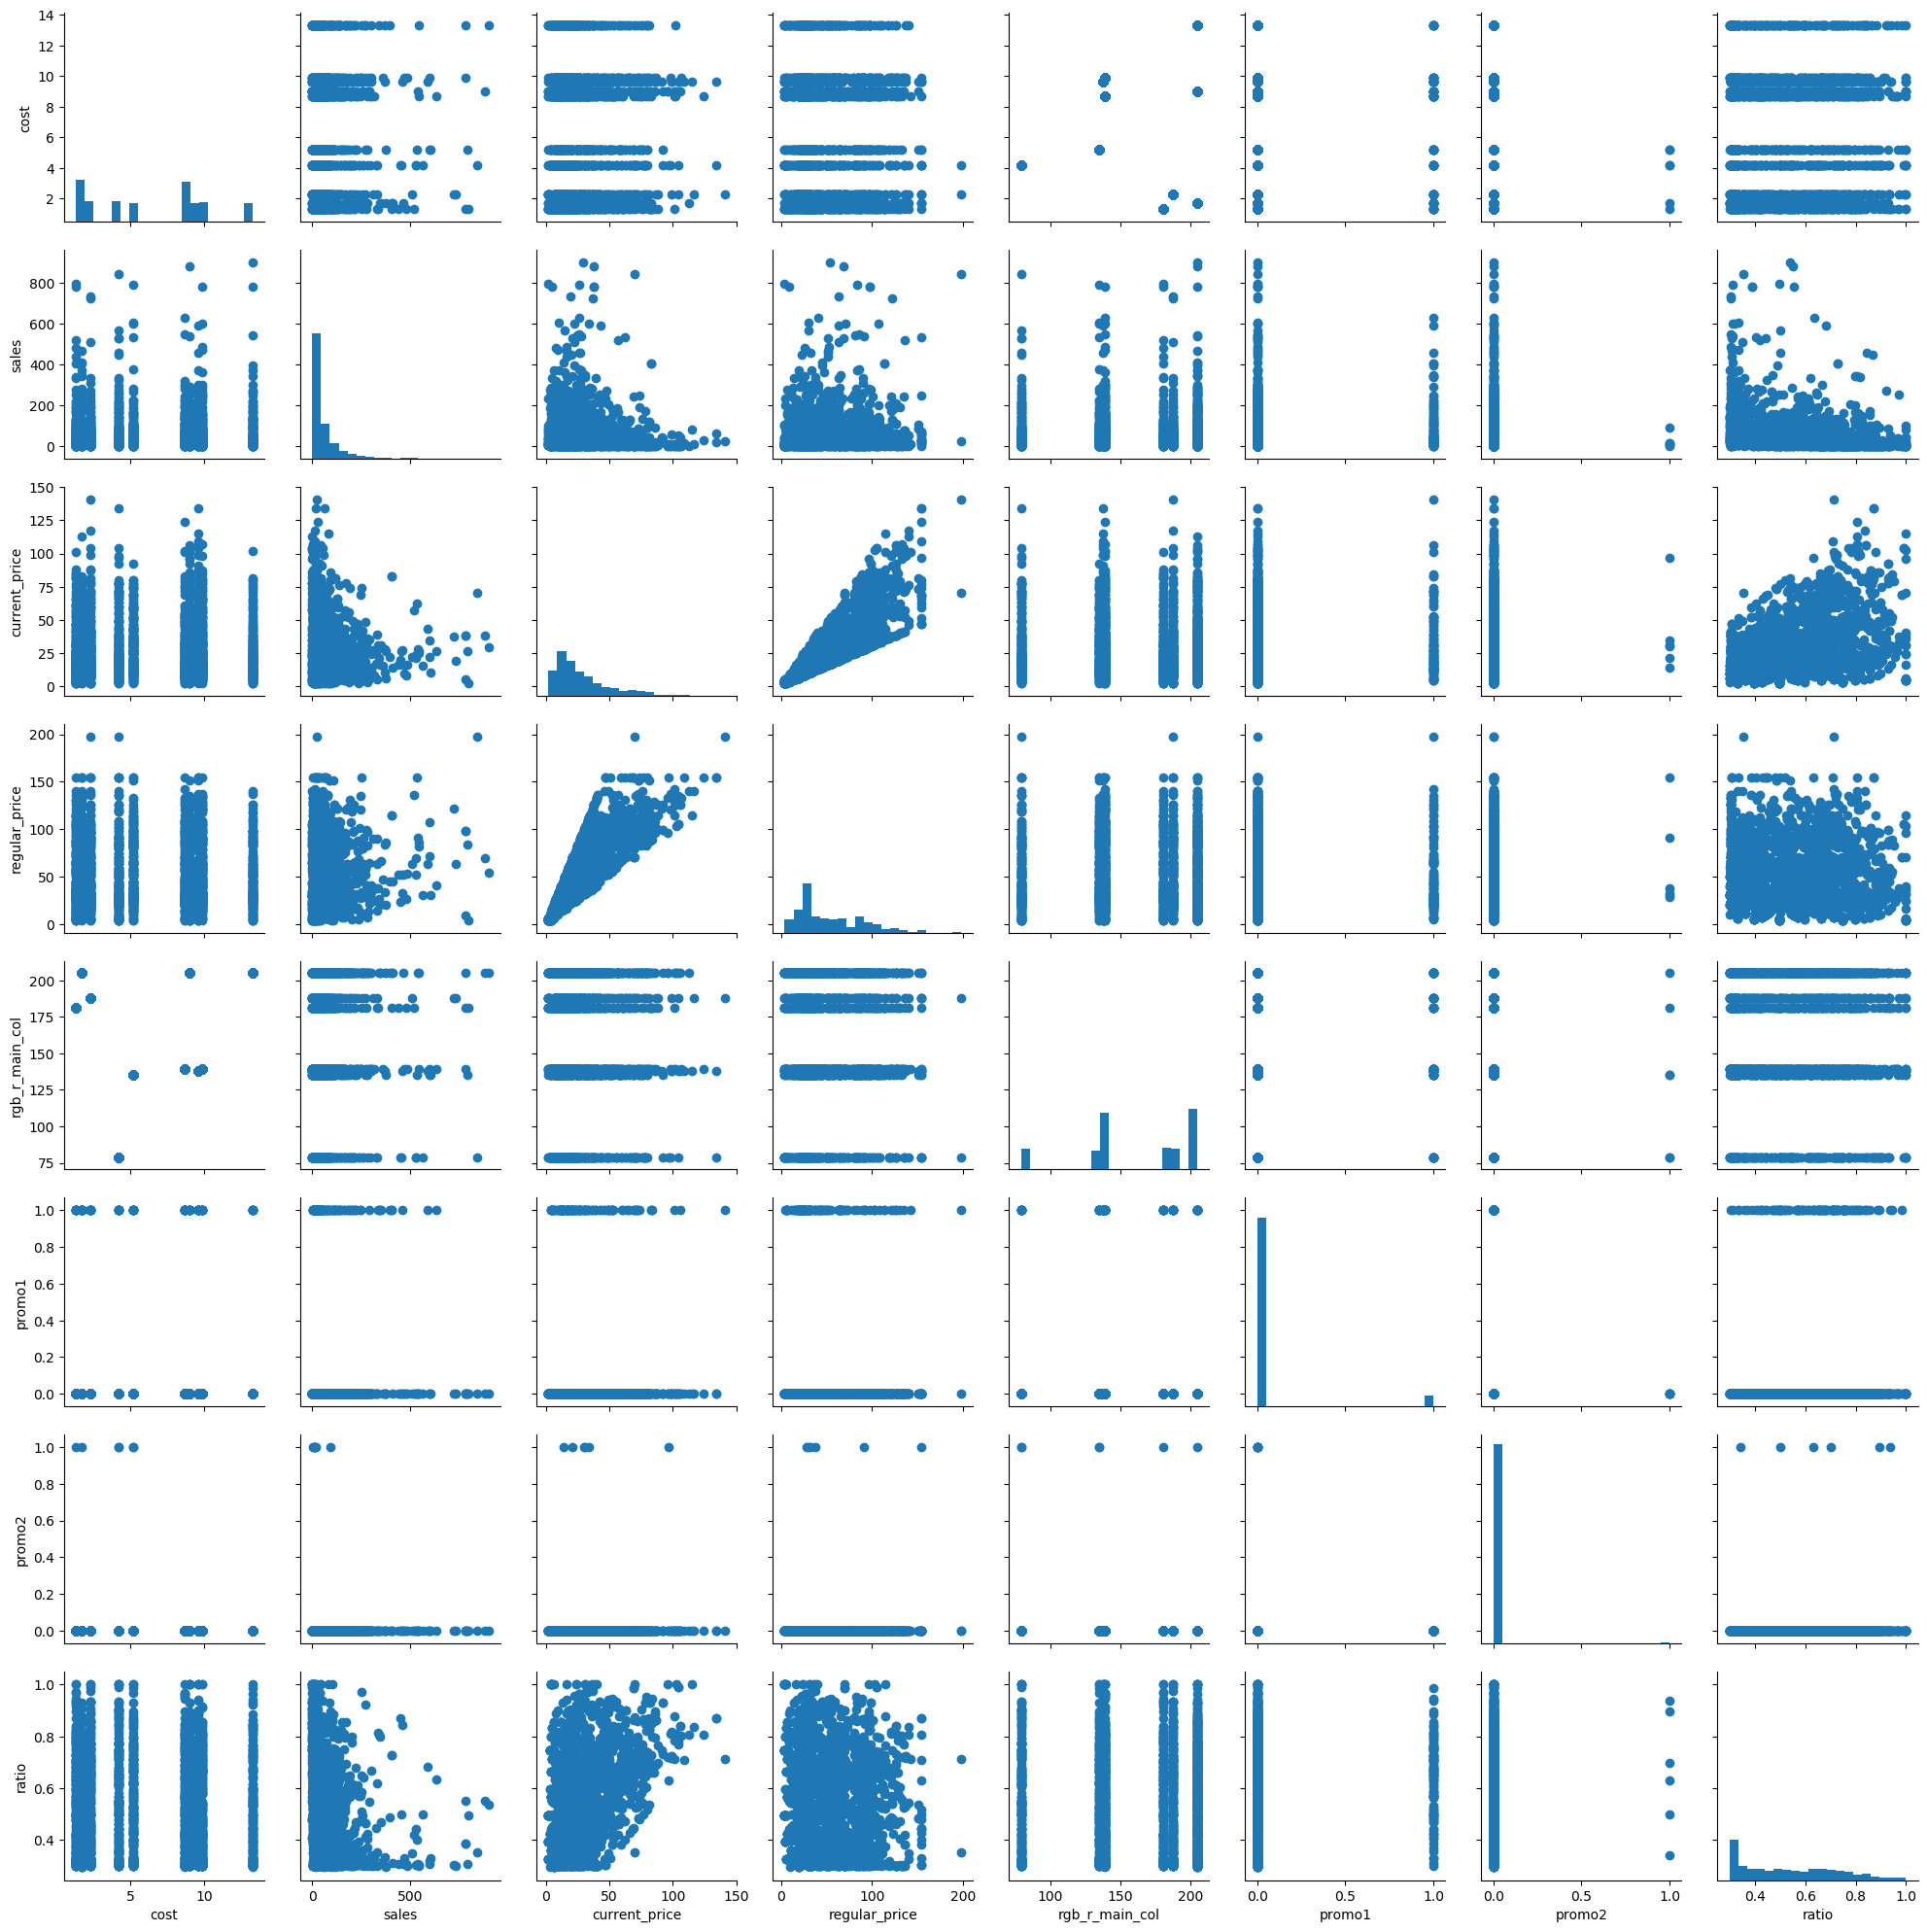

In [69]:
# plot matrix: sample 2000  so that plots are clearer and
# they render faster
import numpy as np
import seaborn as sb

numeric_vars = ['cost', 'sales', 'current_price', 'regular_price', 'rgb_r_main_col', 'promo1', 'promo2', 'ratio']

samples = np.random.choice(sales_data.shape[0], 2000, replace = False)
diamonds_samp = sales_data.loc[samples,:]

g = sb.PairGrid(data = diamonds_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

### *Spearman Matrix

In [59]:
#Spearman matrix
corr = sales_data.corr()
corr

,sales,regular_price,current_price,ratio,promo1,promo2,customer_id,cost,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
sales,1.000000e+00,5.175875e-03,-1.205093e-01,-2.704180e-01,1.148382e-01,-2.480468e-03,-9.034924e-04,2.052549e-18,-1.156721e-18,6.471264e-19,-1.345304e-18,9.778917e-19,9.869572e-19,3.113827e-18,-0.116651
regular_price,5.175875e-03,1.000000e+00,8.409200e-01,-4.321212e-02,-3.695493e-03,1.314716e-03,1.399264e-02,-2.449963e-18,-2.652886e-19,9.437540e-19,5.152606e-18,-1.692985e-18,-4.672519e-18,-3.468116e-18,-0.015027
current_price,-1.205093e-01,8.409200e-01,1.000000e+00,4.127533e-01,5.966158e-02,1.657370e-02,1.947868e-02,3.553581e-18,2.752366e-19,-7.217493e-19,6.825959e-18,-4.199251e-18,2.094599e-18,-7.168336e-19,0.183402
ratio,-2.704180e-01,-4.321212e-02,4.127533e-01,1.000000e+00,1.443172e-01,3.511546e-02,1.017980e-02,-8.816913e-19,3.530941e-18,5.938419e-19,5.840377e-19,-1.196601e-18,7.261169e-19,8.774995e-19,0.447122
promo1,1.148382e-01,-3.695493e-03,5.966158e-02,1.443172e-01,1.000000e+00,4.734652e-02,6.278713e-03,5.894816e-18,6.563842e-18,-2.345262e-18,-3.392335e-21,3.045785e-19,-1.517934e-17,6.991397e-18,0.064105
promo2,-2.480468e-03,1.314716e-03,1.657370e-02,3.511546e-02,4.734652e-02,1.000000e+00,9.797080e-03,1.369909e-18,-2.356033e-19,-2.179303e-18,-1.072713e-20,4.044279e-19,7.376579e-18,-4.456777e-20,0.020165
customer_id,-9.034924e-04,1.399264e-02,1.947868e-02,1.017980e-02,6.278713e-03,9.797080e-03,1.000000e+00,3.470164e-20,-1.631100e-18,7.278486e-19,-1.174776e-20,-1.955726e-18,2.503258e-18,-6.470624e-18,0.004006
cost,2.052549e-18,-2.449963e-18,3.553581e-18,-8.816913e-19,5.894816e-18,1.369909e-18,3.470164e-20,1.000000e+00,4.829037e-03,-7.337551e-01,-1.102127e-01,-1.785002e-01,1.189099e-01,2.400004e-02,0.002130
rgb_r_main_col,-1.156721e-18,-2.652886e-19,2.752366e-19,3.530941e-18,6.563842e-18,-2.356033e-19,-1.631100e-18,4.829037e-03,1.000000e+00,2.278015e-01,-5.307091e-01,5.864479e-01,1.695861e-02,3.448846e-01,-0.001328
rgb_g_main_col,6.471264e-19,9.437540e-19,-7.217493e-19,5.938419e-19,-2.345262e-18,-2.179303e-18,7.278486e-19,-7.337551e-01,2.278015e-01,1.000000e+00,1.730695e-01,3.742056e-01,-1.230575e-01,8.089808e-02,-0.007542


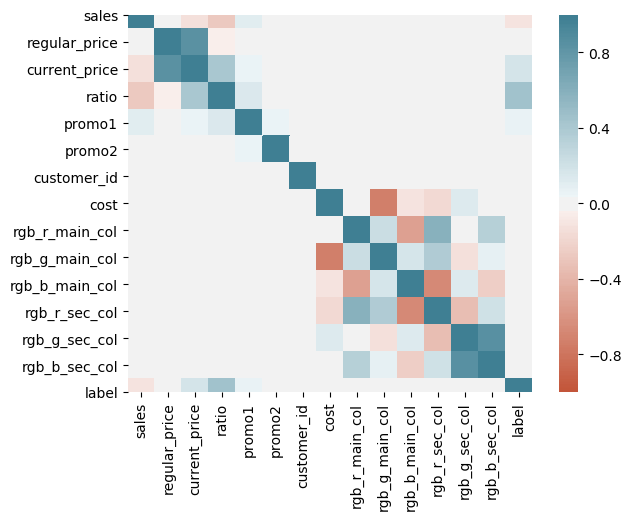

In [60]:
import seaborn as sns
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

there are only:

    #strong positive correlation between: (regular_price, current_price)
    
    #weak positive correlation between: (current_price, ratio) , (ratio, promo1) , (ratio, label) , (promo1, sales) , (promo1,sales) 
    
    #strong negative correlation between: (sales, ratio) , (sales, label) , (cost, rgb_g_main_col) 
    
    #week negative correlation: (regular_price, ratio) , (cost, rgb_r_sec_col)

### Box Plots
A box plot is another way of showing the relationship between a numeric variable and a categorical variable. Compared to the violin plot, the box plot leans more on summarization of the data, primarily just reporting a set of descriptive statistics for the numeric values on each categorical level. A box plot can be created using seaborn's boxplot function

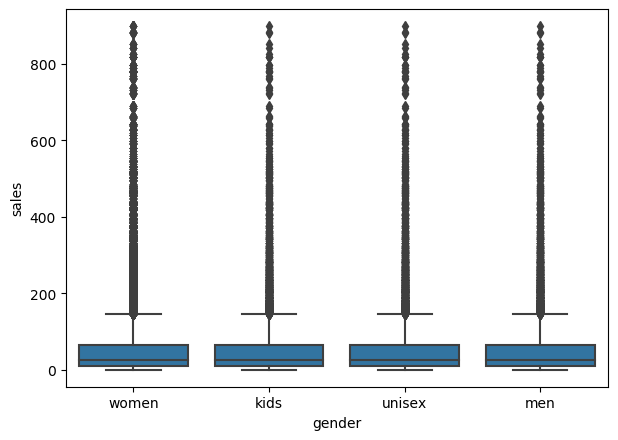

In [64]:
sb.boxplot(data = sales_data, x = 'gender', y = 'sales', color = base_color)

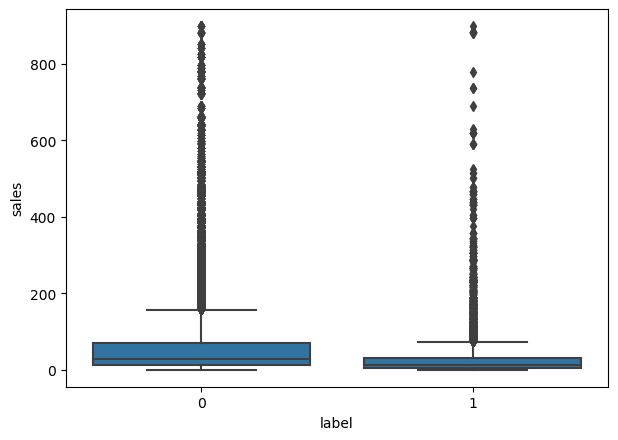

In [65]:
sb.boxplot(data = sales_data, x = 'label', y = 'sales', color = base_color)

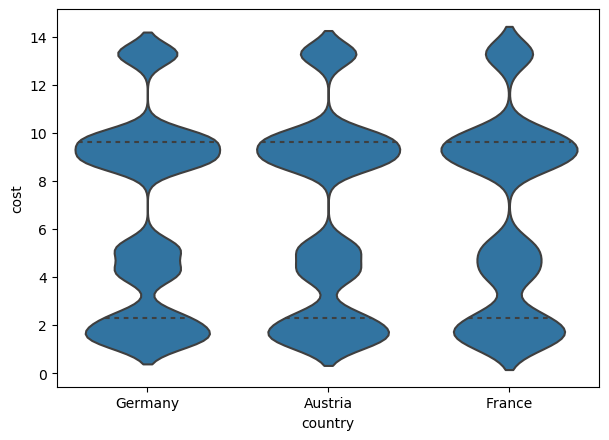

In [67]:
base_color = sb.color_palette()[0]
sb.violinplot(data = sales_data, x = 'country', y = 'cost', color = base_color,
              inner = 'quartile')

## 3)MultiVariate

## *Scatterplot

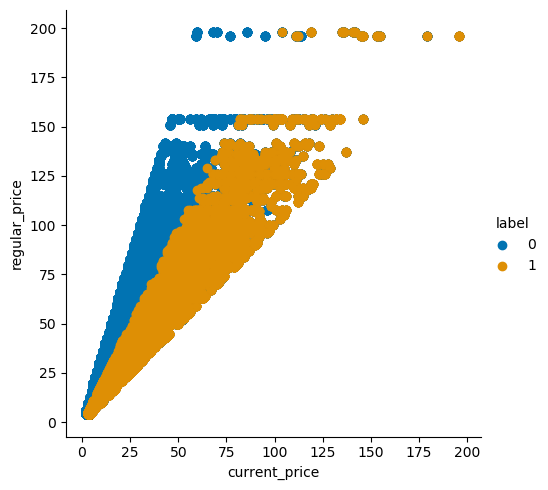

In [71]:
g = sb.FacetGrid(data = sales_data, hue = 'label', size = 5,
                 palette = 'colorblind')
g.map(plt.scatter, 'current_price', 'regular_price')
g.add_legend()

label 0 and 1 are similar in count and they are interacting 